**Assignment on Clustering**

Try out different clustering models in the given dataset. Find the optimum number of clusters in each model and create the model with the optimum number of
clusters.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
data = pd.read_csv('Wine_clust.csv')

In [3]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [4]:
# Function to find optimal clusters for K-means using Elbow Method and Silhouette Score
def kmeans_clustering(data, max_k=10):
    wcss = []
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    return wcss, silhouette_scores

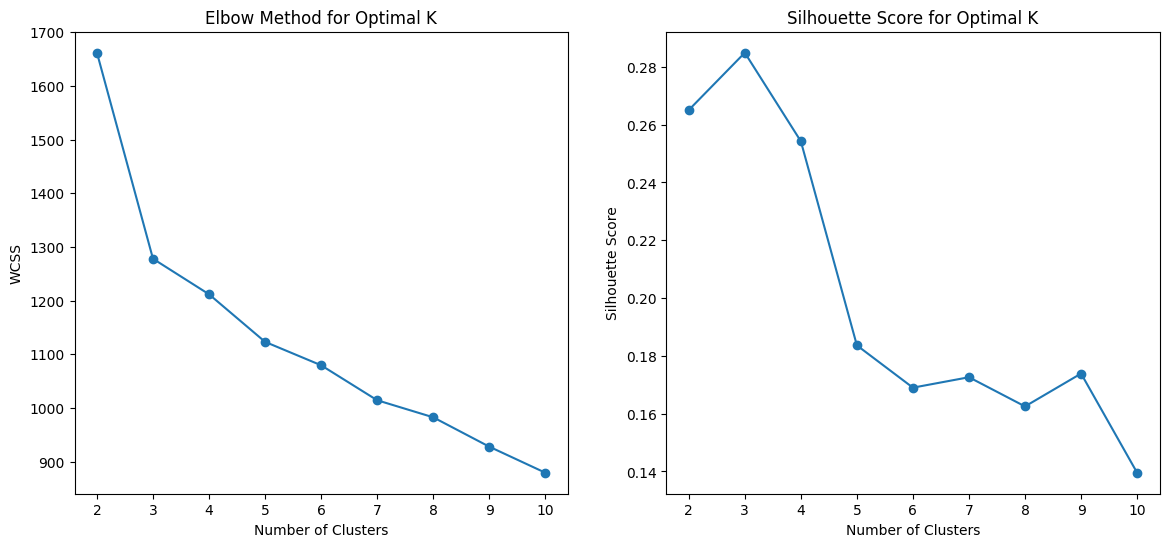

In [5]:
# Plot Elbow Method and Silhouette Scores for K-means
wcss, silhouette_scores = kmeans_clustering(data_scaled)
k_range = range(2, 11)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [6]:
# Fit K-means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_optimal.fit_predict(data_scaled)
data['KMeans_Cluster'] = kmeans_labels


In [7]:
# Summary of K-means clusters
kmeans_summary = data.groupby('KMeans_Cluster').mean()
print("K-means Cluster Summary:")
print(kmeans_summary)

K-means Cluster Summary:
                  Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
KMeans_Cluster                                                              
0               12.250923    1.897385  2.231231     20.063077   92.738462   
1               13.134118    3.307255  2.417647     21.241176   98.666667   
2               13.676774    1.997903  2.466290     17.462903  107.967742   

                Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
KMeans_Cluster                                                    
0                    2.247692    2.050000              0.357692   
1                    1.683922    0.818824              0.451961   
2                    2.847581    3.003226              0.292097   

                Proanthocyanins  Color_Intensity       Hue     OD280  \
KMeans_Cluster                                                         
0                      1.624154         2.973077  1.062708  2.803385   
1                      1.145882      

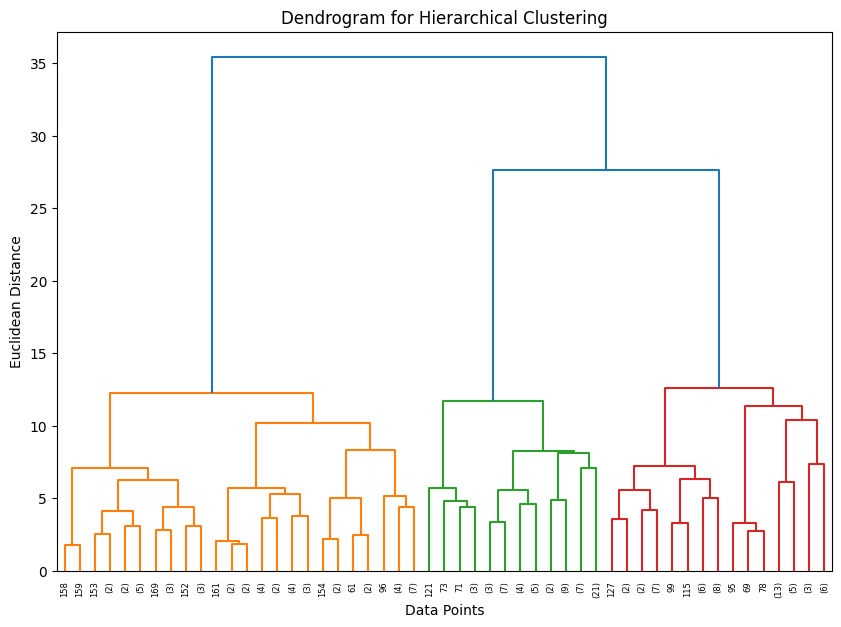

In [8]:
# Hierarchical Clustering Dendrogram
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [9]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
data['DBSCAN_Cluster'] = dbscan_labels

In [10]:
# Summary of DBSCAN clusters
dbscan_summary = data.groupby('DBSCAN_Cluster').mean()
print("DBSCAN Cluster Summary:")
print(dbscan_summary)


DBSCAN Cluster Summary:
                  Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
DBSCAN_Cluster                                                             
-1              13.000618    2.336348  2.366517     19.494944  99.741573   

                Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
DBSCAN_Cluster                                                    
-1                   2.295112     2.02927              0.361854   

                Proanthocyanins  Color_Intensity       Hue     OD280  \
DBSCAN_Cluster                                                         
-1                     1.590899          5.05809  0.957449  2.611685   

                   Proline  KMeans_Cluster  
DBSCAN_Cluster                              
-1              746.893258        0.983146  
